In [1]:
import pandas as pd
import numpy as np
import os

path = 'data'
files = os.listdir(path)
print(files)

['experiment_01.csv', 'experiment_02.csv', 'experiment_03.csv', 'experiment_04.csv', 'experiment_05.csv', 'experiment_06.csv', 'experiment_07.csv', 'experiment_08.csv', 'experiment_09.csv', 'experiment_10.csv', 'experiment_11.csv', 'experiment_12.csv', 'experiment_13.csv', 'experiment_14.csv', 'experiment_15.csv', 'experiment_16.csv', 'experiment_17.csv', 'experiment_18.csv', 'README.txt', 'train.csv']


In [2]:
label = pd.read_csv(os.path.join(path, 'train.csv'))
label.head()

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN


In [3]:
file_name = os.path.join(path, files[0])
df_tmp = pd.read_csv(file_name)
df_tmp.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep


In [4]:
cols = ['material', 'tool_condition', 'machining_finalized', 'passed_visual_inspection']
for col in cols:
    print(col, 'unique:', label[col].unique())

material unique: ['wax']
tool_condition unique: ['unworn' 'worn']
machining_finalized unique: ['yes' 'no']
passed_visual_inspection unique: ['yes' nan 'no']


In [5]:
d_material = {'wax': 0}
d_tool_condition = {'unworn': 0, 'worn':1}
d_machining_finalized = {'yes': 1, 'no': 0}
d_passed_visual_inspection = {'yes':1, 'no': 0, np.nan: 0}
d_list = [d_material, d_tool_condition, d_machining_finalized, d_passed_visual_inspection]
for i in range(len(cols)):
    col = cols[i]
    d = d_list[i]
    label[col] = label[col].map(d)
label.head()

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,0,6,4.0,0,1,1
1,2,0,20,4.0,0,1,1
2,3,0,6,3.0,0,1,1
3,4,0,6,2.5,0,0,0
4,5,0,20,3.0,0,0,0


In [6]:
df_tmp['experiment'] = 1
df_tmp['feedrate'] = label.iloc[0]['feedrate']
df_tmp['feedrate'] = label.iloc[0]['feedrate']
df_tmp['clamp_pressure'] = label.iloc[0]['clamp_pressure']
df_tmp['tool_condition'] = label.iloc[0]['tool_condition']
df_tmp['machining_finalized'] = label.iloc[0]['machining_finalized']
df_tmp['passed_visual_inspection'] = label.iloc[0]['passed_visual_inspection']

In [7]:
df = df_tmp

In [8]:
for i in range(1,18):
    file_name = os.path.join(path, files[i])
    df_tmp = pd.read_csv(file_name)
    
    df_tmp['experiment'] = i+1
    df_tmp['feedrate'] = label.iloc[i]['feedrate']
    df_tmp['clamp_pressure'] = label.iloc[i]['clamp_pressure']
    df_tmp['tool_condition'] = label.iloc[i]['tool_condition']
    df_tmp['machining_finalized'] = label.iloc[i]['machining_finalized']
    df_tmp['passed_visual_inspection'] = label.iloc[i]['passed_visual_inspection']
    print(files[i],'shape:',df_tmp.shape)
    df = pd.concat([df, df_tmp])

experiment_02.csv shape: (1668, 54)
experiment_03.csv shape: (1521, 54)
experiment_04.csv shape: (532, 54)
experiment_05.csv shape: (462, 54)
experiment_06.csv shape: (1296, 54)
experiment_07.csv shape: (565, 54)
experiment_08.csv shape: (605, 54)
experiment_09.csv shape: (740, 54)
experiment_10.csv shape: (1301, 54)
experiment_11.csv shape: (2314, 54)
experiment_12.csv shape: (2276, 54)
experiment_13.csv shape: (2233, 54)
experiment_14.csv shape: (2332, 54)
experiment_15.csv shape: (1381, 54)
experiment_16.csv shape: (602, 54)
experiment_17.csv shape: (2150, 54)
experiment_18.csv shape: (2253, 54)


In [9]:
df.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,experiment,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,1.0,0.0,50.0,Starting,1,6.0,4.0,0.0,1.0,1.0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,1.0,4.0,50.0,Prep,1,6.0,4.0,0.0,1.0,1.0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,1.0,7.0,50.0,Prep,1,6.0,4.0,0.0,1.0,1.0
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,1.0,7.0,50.0,Prep,1,6.0,4.0,0.0,1.0,1.0
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,1.0,7.0,50.0,Prep,1,6.0,4.0,0.0,1.0,1.0


In [16]:
df_corr=abs(df.drop(['experiment', 'Machining_Process'], axis=1).corr())
df_corr = df_corr.sort_values(by=['tool_condition'], ascending=False)['tool_condition']

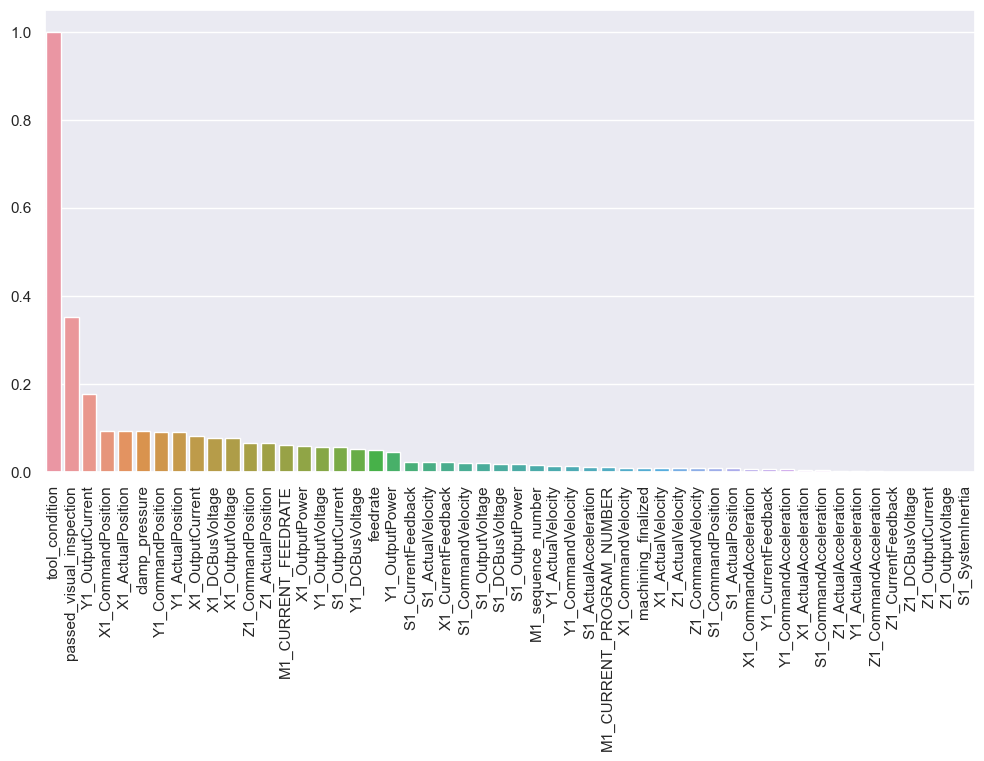

In [23]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=df_corr.index, y=df_corr.values)
ax.tick_params(axis = "x", rotation = 90)

In [18]:
df_corr

tool_condition               1.000000
passed_visual_inspection     0.351130
Y1_OutputCurrent             0.176805
X1_CommandPosition           0.092029
X1_ActualPosition            0.091920
clamp_pressure               0.091851
Y1_CommandPosition           0.090920
Y1_ActualPosition            0.090862
X1_OutputCurrent             0.080973
X1_DCBusVoltage              0.076864
X1_OutputVoltage             0.075167
Z1_CommandPosition           0.064638
Z1_ActualPosition            0.064627
M1_CURRENT_FEEDRATE          0.061106
X1_OutputPower               0.058509
Y1_OutputVoltage             0.056277
S1_OutputCurrent             0.054738
Y1_DCBusVoltage              0.050999
feedrate                     0.049609
Y1_OutputPower               0.045418
S1_CurrentFeedback           0.022222
S1_ActualVelocity            0.021777
X1_CurrentFeedback           0.020931
S1_CommandVelocity           0.019994
S1_OutputVoltage             0.019141
S1_DCBusVoltage              0.018190
S1_OutputPow